# Import Libraries


In [1]:
import pandas as pd
import numpy as np
import os
import nltk
import tensorflow as tf
from keras.layers import *
from tensorflow import *
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import *
from nltk.tokenize import word_tokenize, sent_tokenize
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import  CountVectorizer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
import csv
import random
from collections import Counter
from utils.textnormalization import TextNormalization
from utils.machinelearning import machine_learning_model, fit_model, metrics_values, confusion_matrix_
from utils.deeplearning import convolutional_neural_network_1d, model_compile, model_fit, evaluate, plot_accuracy_loss, lstm_, gru_
from utils.sentimentinformation import sentiment_percentage, sentiment_counts
from utils.wordcloud import wordcloud
from utils.most_frequent_word_plot import go_figure , bar_plot
from utils.deeplearning_preprcosesing import  deeplearning_preprcosesing_
pd.options.display.max_rows = 100
pd.options.display.max_columns =None 
import arabic_reshaper
from bidi.algorithm import get_display
tf.keras.utils.set_random_seed(1)
tf.config.experimental.enable_op_determinism()

# Download Some Packages

In [2]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/osamaanmar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/osamaanmar/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/osamaanmar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/osamaanmar/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

# Ignore Warnings

In [3]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
warnings.filterwarnings(action='ignore')

# Read Data

In [4]:
Corpus = pd.read_excel('original_dataset.xlsx')
Corpus.rename(columns={'rating': 'Sentiment', 'review_description': 'Review'}, inplace=True)
Corpus['Review'] = Corpus['Review'].astype(str)
Corpus.drop(columns=['Unnamed: 0', 'company'], axis=1, inplace=True)
Corpus = Corpus.sample(frac = 1)
Corpus.tail(10)

,Review,Sentiment
21758,Nbiii Fridaays♡.♡!!!!,Neutral
36230,ينفع وقت اليوع,Positive
31228,ممتاز يمش,Negative
43757,البرنامج رائع جدا جدا جدا,Positive
7751,لا للتسعيره الجديده,Negative
49100,لا جديد يذكر ... عزيز زي ما هو ندل وجمانه ضعيف...,Neutral
20609,مقابل مسجد الجوزاء,Neutral
21440,بناية مطعم كاس الخليج فرع الفطائر,Positive
50057,مرضي. الباص للحرم.,Neutral
5192,عايز اطلب والتطبيق مش بيفتح,Negative


# Sentiment Information

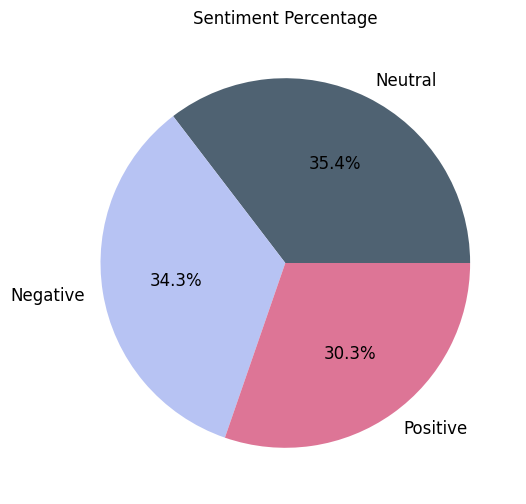

In [5]:
sentiment_percentage(Corpus, 'Sentiment', (6, 6))

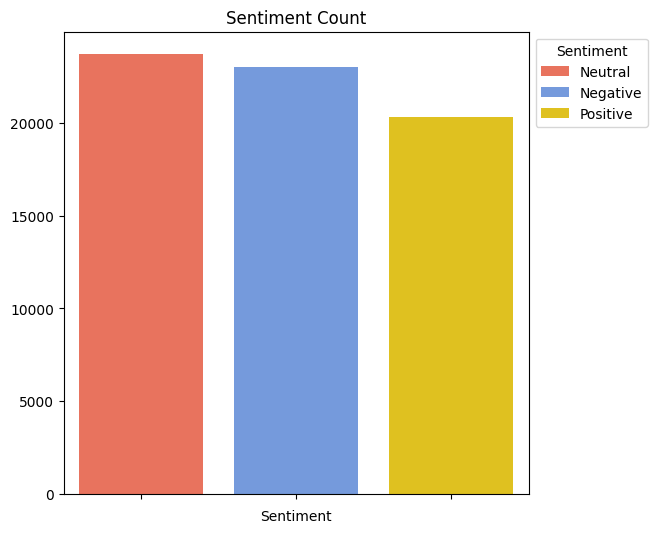

In [6]:
sentiment_counts(Corpus, 'Sentiment', (6, 6))

# Number Of Sentences

In [7]:
Corpus['NumberOfSentences'] = Corpus['Review'].apply(lambda n:len(sent_tokenize(n)))
Corpus.drop(Corpus[Corpus["NumberOfSentences"] == 0].index, inplace = True)


In [8]:
Corpus['NumberOfSentences'].sum()

121704

# Average Number Of Sentences

In [9]:
AverageNumberOfSentence = int(np.round(Corpus["NumberOfSentences"].mean()))
AverageNumberOfSentence

2

# Maximum Number Of Sentences

In [10]:
MaximumNumberOfSentence = Corpus["NumberOfSentences"].max()
MaximumNumberOfSentence

176

# Minimum Number Of Sentences

In [11]:
MinimumNumberOfSentence = Corpus["NumberOfSentences"].min()
MinimumNumberOfSentence

1

# Text Normalization

In [12]:
text_normalization = TextNormalization(_remove_emojis = True,
                                        _remove_hashtags = True,
                                        _remove_emails = True ,
                                        _remove_url = True,
                                        _remove_mention = True,
                                        _remove_duplicate_char = True,
                                        _remove_single_char = True,
                                        _remove_special_character_ = True,
                                        _remove_new_line_char = True,
                                        _remove_number = True,
                                        _remove_html_tags = True,
                                        _remove_arabic_diacritics_ = True,
                                        _normalize_arabic_unicode_ = True,
                                        _normalize_alef_maksura_ar_ = True,
                                        _normalize_alef_ar_ = True,
                                        _normalize_teh_marbuta_ar_ = True,
                                        _remove_non_arabic = True,
                                        _remove_whitespace_ = True,
                                        _remove_unicode_characters_ = True,
                                        _remove_longest_than_ = True,
                                        _remove_stop_words = True,
                                        _lemmatizer_ = False,
                                        _stemmer_ = False)

In [13]:
Corpus['Normalized_Review'] = Corpus['Review'].apply(lambda x: text_normalization.normalization(x))
Corpus.tail(5)

,Review,Sentiment,NumberOfSentences,Normalized_Review
49100,لا جديد يذكر ... عزيز زي ما هو ندل وجمانه ضعيف...,Neutral,1,جديد عزيز زي ندل وجمانه ضعيفه وسلبيه وكمان غبيه
20609,مقابل مسجد الجوزاء,Neutral,1,مسجد الجوزاء
21440,بناية مطعم كاس الخليج فرع الفطائر,Positive,1,بنايه مطعم كاس الخليج فرع الفطائر
50057,مرضي. الباص للحرم.,Neutral,2,مرضي الباص للحرم
5192,عايز اطلب والتطبيق مش بيفتح,Negative,1,عايز اطلب والتطبيق مش بيفتح


In [14]:
Corpus.dropna(axis=1, inplace=True)

# Number Of Unique Words

In [15]:
UniqueWords = set()
for word in Corpus['Normalized_Review'].str.split():
    UniqueWords.update(word)

len(UniqueWords)

136658

# WordCloud

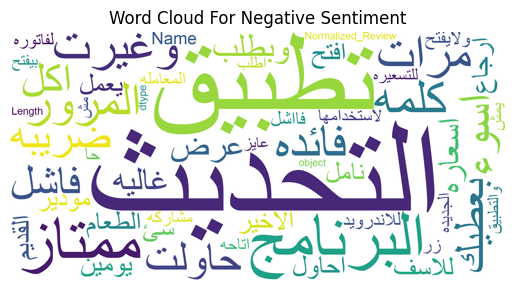

In [16]:
wordcloud(data=Corpus, target='Negative', width=2000, hieght=1000, text='Normalized_Review')

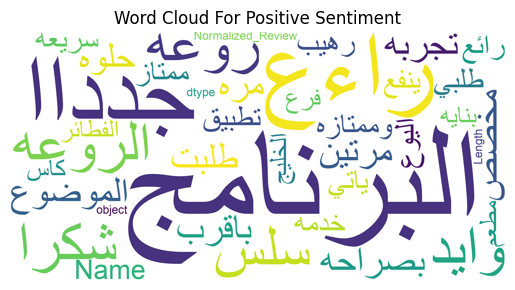

In [17]:
wordcloud(data=Corpus, target='Positive', width=2000, hieght=1000, text='Normalized_Review')

# Most Frequent Words 

In [18]:
MostFrequentWord = Counter((Corpus['Normalized_Review']).str.split().explode()).most_common(15)
MostFrequentWordDF = pd.DataFrame(MostFrequentWord, columns=('Word', 'Count'))
MostFrequentWordDF

,Word,Count
0,التطبيق,5878
1,الروايه,5684
2,الكتاب,5492
3,تطبيق,4652
4,مش,3793
5,ممتاز,3480
6,الفندق,3357
7,الله,3330
8,اللي,3272
9,البرنامج,3102


In [19]:
go_figure(data=MostFrequentWordDF)

In [20]:
bar_plot(data=MostFrequentWordDF)

# Number Of Words 

In [21]:
Corpus["Number of Words"] = Corpus["Normalized_Review"].apply(lambda n:len(word_tokenize(n)))
Corpus.drop(Corpus[ Corpus["Number of Words"] == 0].index, inplace = True)
Corpus["Number of Words"].sum()

1039837

# Number Of Charachters 

In [22]:
Corpus["Number of Charachters"] = Corpus["Normalized_Review"].str.len()
Corpus["Number of Charachters"].sum()

6403749

# Average Number Of Words 

In [23]:
AverageNaumberOfWords = int(np.round((Corpus["Number of Words"].mean())))
AverageNaumberOfWords

16

# Average Number Of Charachters 

In [24]:
AverageNumberOfCharachters = int(np.round(Corpus["Number of Charachters"].mean()))
AverageNumberOfCharachters

98

# Maximum Number Of Word

In [25]:
MaximumNaumberOfWords = Corpus["Number of Words"].max()
MaximumNaumberOfWords

922

# Maximum Number Of Charachters 

In [26]:
MaximumNumberOfCharachters = Corpus['Number of Charachters'].max() 
MaximumNumberOfCharachters

6112

# Minimum Number Of Words

In [27]:
MimimumNaumberOfWords = Corpus["Number of Words"].min()
MimimumNaumberOfWords

1

# Minimum Number Of Charachters 

In [28]:
MinimumNumberOfCharachters = Corpus['Number of Charachters'].min() 
MinimumNumberOfCharachters

1

# Split The Dataset Into X And y

In [29]:
X, y = Corpus['Normalized_Review'], Corpus['Sentiment']
le = LabelEncoder()
y = le.fit_transform(y)

# Split The Dataset Into Training And Testing

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=33)

# CountVectorizer

In [31]:
CountVectorizer_ = CountVectorizer()
X_train_CV_ = CountVectorizer_.fit_transform(X_train)
X_test_CV_ = CountVectorizer_.transform(X_test)

In [32]:
Vocabulary = CountVectorizer_.vocabulary_
Vocabulary

{'حلو': 45609,
 'لزوم': 67407,
 'الترقيه': 10307,
 'الموقع': 22293,
 'دورات': 47818,
 'المياه': 22371,
 'هوز': 85081,
 'ني': 83983,
 'استخدمت': 3707,
 'سطل': 51191,
 'تطبيق': 39600,
 'لايفتح': 65815,
 'اصف': 4999,
 'قراءتي': 61418,
 'الروايه': 13716,
 'استمتعت': 4114,
 'مات': 72900,
 'بدا': 31010,
 'الملل': 21685,
 'يتسلل': 105257,
 'قراءه': 61420,
 'جميله': 43879,
 'وممتعه': 101634,
 'مقبول': 79322,
 'الفندق': 17393,
 'مقبل': 79315,
 'السعر': 14303,
 'مدخل': 76431,
 'والغرف': 90004,
 'يحتاج': 105975,
 'تجديد': 37062,
 'اثاث': 1284,
 'طلبات': 55056,
 'جديد': 43382,
 'ممتاز': 80079,
 'وجميل': 94919,
 'يحكي': 106189,
 'احمد': 2096,
 'خليل': 46874,
 'الكتاب': 18155,
 'كشاب': 63384,
 'تربي': 38205,
 'بيئه': 34922,
 'متدينه': 74772,
 'محافظه': 75777,
 'ومتصله': 100551,
 'بالمسجد': 28597,
 'كبر': 62758,
 'يحمل': 106219,
 'اسلاميته': 4434,
 'ضلوعه': 54558,
 'فتراه': 58979,
 'يميل': 109535,
 'للسلفيه': 69773,
 'للاخوان': 68652,
 'وكوضع': 99410,
 'طبيعي': 54843,
 'يحضتنه': 106128,
 'الاخوان': 7

# Machine Learning

**1-Naive Bayes**

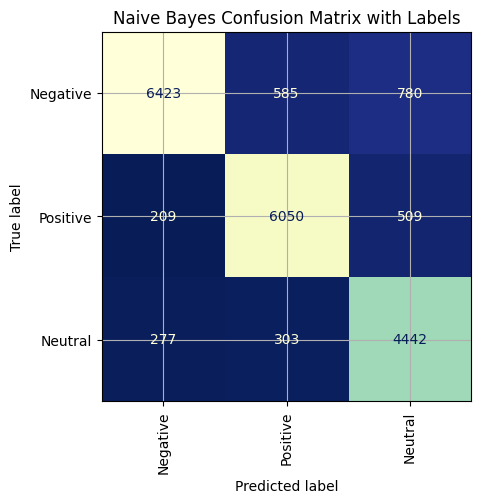

In [33]:
Algorithm = MultinomialNB(alpha= 1)
Naive_Bayes = machine_learning_model(algorithm=Algorithm)
fit_model(model=Naive_Bayes, X_train=X_train_CV_, y_train=y_train)
confusion_matrix_(model=Naive_Bayes, X_test=X_test_CV_, y_test=y_test, name='Naive Bayes')

In [34]:
metrics_values(model= Naive_Bayes, X_test=X_test_CV_, y_test=y_test)

,Values
Accuracy,0.863980
Precision,0.867717
Recall,0.858916
F1Score,0.861023
Error,0.136020


**2-Logistic Regression**

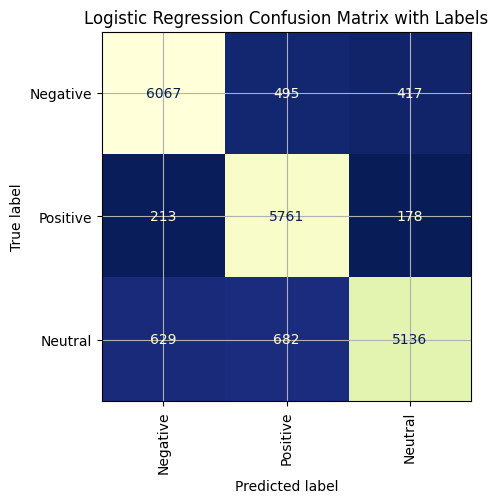

In [35]:
Algorithm = LogisticRegression()
Logistic_Regression = machine_learning_model(algorithm=Algorithm)
fit_model(model=Logistic_Regression, X_train=X_train_CV_, y_train=y_train)
confusion_matrix_(Logistic_Regression, X_test=X_test_CV_, y_test=y_test, name='Logistic Regression')

In [36]:
metrics_values(model= Logistic_Regression, X_test=X_test_CV_, y_test=y_test)

,Values
Accuracy,0.866483
Precision,0.867472
Recall,0.868221
F1Score,0.865802
Error,0.133517


**3-Decision Tree**

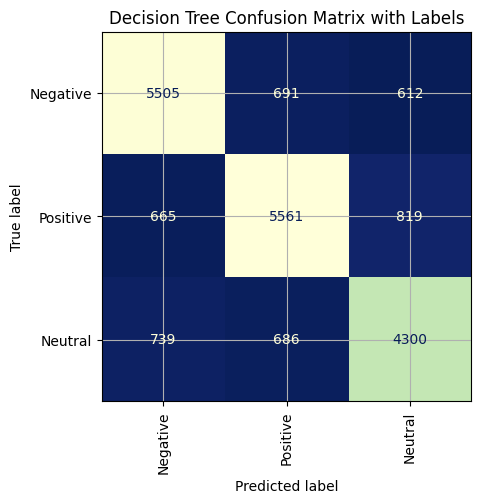

In [37]:
Algorithm = DecisionTreeClassifier(criterion='gini')
Decision_Tree = machine_learning_model(algorithm=Algorithm)
fit_model(model=Decision_Tree, X_train=X_train_CV_, y_train=y_train)
confusion_matrix_(model=Decision_Tree, X_test=X_test_CV_, y_test=y_test, name='Decision Tree')

In [38]:
metrics_values(model= Decision_Tree, X_test=X_test_CV_, y_test=y_test)

,Values
Accuracy,0.784861
Precision,0.783018
Recall,0.782873
F1Score,0.782915
Error,0.215139


**4-K Nearest Neighbors**

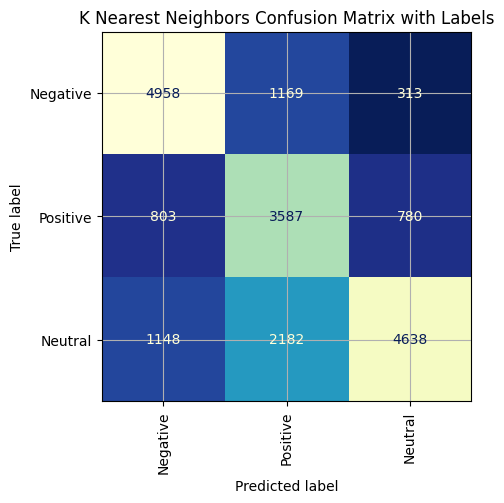

In [39]:
Algorithm =KNeighborsClassifier(metric='euclidean', n_neighbors=5)
K_Nearest_Neighbors = machine_learning_model(algorithm=Algorithm)
fit_model(model=K_Nearest_Neighbors, X_train=X_train_CV_, y_train=y_train)
confusion_matrix_(model=K_Nearest_Neighbors, X_test=X_test_CV_, y_test=y_test, name='K Nearest Neighbors')

In [40]:
metrics_values(model= K_Nearest_Neighbors, X_test=X_test_CV_, y_test=y_test)

,Values
Accuracy,0.673358
Precision,0.681922
Recall,0.681302
F1Score,0.670819
Error,0.326642


**5-Random Forest**

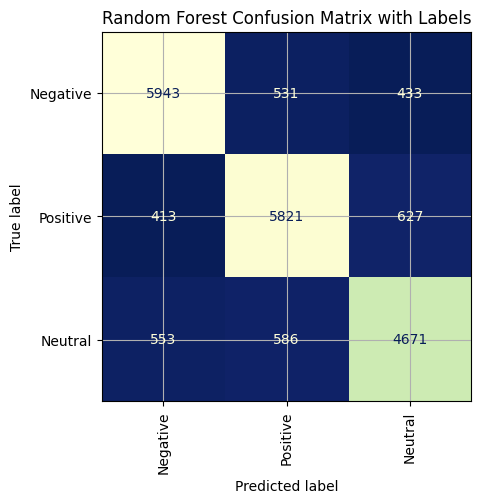

In [41]:
Algorithm = RandomForestClassifier(criterion = 'entropy', n_estimators=300)
Random_Forest = machine_learning_model(algorithm=Algorithm)
fit_model(model=Random_Forest, X_train=X_train_CV_, y_train=y_train)
confusion_matrix_(model=Random_Forest, X_test=X_test_CV_, y_test=y_test, name='Random Forest')

In [42]:
metrics_values(model= Random_Forest, X_test=X_test_CV_, y_test=y_test)

,Values
Accuracy,0.839463
Precision,0.837603
Recall,0.838075
F1Score,0.837818
Error,0.160537


**6-SGD Classifier**

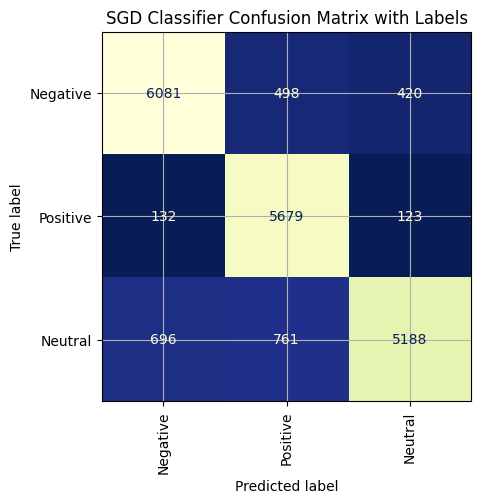

In [43]:
Algorithm = SGDClassifier(loss='hinge')
SGD = machine_learning_model(algorithm=Algorithm)
fit_model(model=SGD, X_train=X_train_CV_, y_train=y_train)
confusion_matrix_(model=SGD, X_test=X_test_CV_, y_test=y_test, name='SGD Classifier')

In [44]:
metrics_values(model= SGD, X_test=X_test_CV_, y_test=y_test)

,Values
Accuracy,0.865666
Precision,0.868868
Recall,0.867981
F1Score,0.865079
Error,0.134334


# Deep Learning

In [45]:
embedding_dim = 32
vocab_size, max_length, encoded_X_train , encoded_X_test = deeplearning_preprcosesing_(X_train=X_train, X_test=X_test,  truncating='pre', padding='pre')

In [46]:
print('The Vocab Size Is :',vocab_size)
print('')
print('The Max Length Is :', max_length)

The Vocab Size Is : 110329

The Max Length Is : 919


In [47]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [48]:
Callback = tf.keras.callbacks.EarlyStopping(
                    monitor="accuracy",
                    mode="max",
                    patience=3
                )

**7-Convolutional Neural Network**

Epoch 1/10
1428/1428 [==============================] - 149s 104ms/step - loss: 0.8256 - accuracy: 0.5595 - val_loss: 0.6640 - val_accuracy: 0.6282
Epoch 2/10
1428/1428 [==============================] - 39s 27ms/step - loss: 0.5697 - accuracy: 0.7590 - val_loss: 0.5242 - val_accuracy: 0.8003
Epoch 3/10
1428/1428 [==============================] - 38s 26ms/step - loss: 0.4513 - accuracy: 0.8277 - val_loss: 0.5170 - val_accuracy: 0.8114
Epoch 4/10
1428/1428 [==============================] - 40s 28ms/step - loss: 0.3913 - accuracy: 0.8575 - val_loss: 0.5307 - val_accuracy: 0.8091
Epoch 5/10
1428/1428 [==============================] - 37s 26ms/step - loss: 0.3383 - accuracy: 0.8824 - val_loss: 0.5191 - val_accuracy: 0.8198
Epoch 6/10
1428/1428 [==============================] - 35s 24ms/step - loss: 0.2915 - accuracy: 0.9020 - val_loss: 0.5237 - val_accuracy: 0.8206
Epoch 7/10
1428/1428 [==============================] - 34s 24ms/step - loss: 0.2584 - accuracy: 0.9132 - val_loss: 0.5379

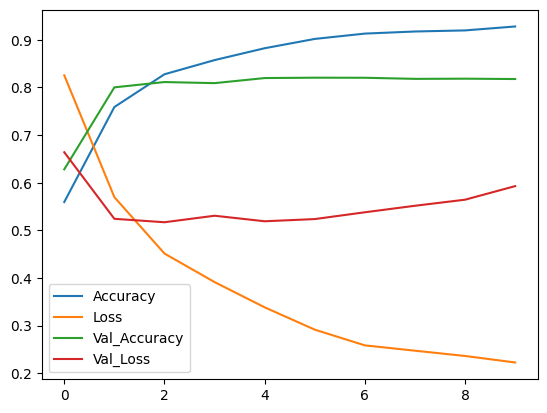

 
The Training Loss is 0.1634, And Training Accuracy is 0.9526
 
The Testing Loss is 0.5929, And Testing Accuracy is 0.8178


In [49]:
convolutional_neural_network = convolutional_neural_network_1d(vocab_size=vocab_size + 1, embedding_dim=embedding_dim, max_length=max_length, dropout=0.6, kernel=2, filters=32, strides=3, padding='same')
model_compile(model=convolutional_neural_network)
history = model_fit(model=convolutional_neural_network, X_train=encoded_X_train, y_train=y_train, epochs=10, X_test=encoded_X_test, y_test=y_test, batch_size=32, Callback=Callback, shuffle=True)
plot_accuracy_loss(histoty=history)
evaluate(model=convolutional_neural_network, x=encoded_X_train, y=y_train, train_test='Training')
evaluate(model=convolutional_neural_network, x=encoded_X_test, y=y_test, train_test='Testing')

**8-LSTM**

Epoch 1/5
714/714 [==============================] - 173s 240ms/step - loss: 0.4841 - accuracy: 0.8101 - val_loss: 0.3432 - val_accuracy: 0.8749
Epoch 2/5
714/714 [==============================] - 138s 193ms/step - loss: 0.3728 - accuracy: 0.8734 - val_loss: 0.3724 - val_accuracy: 0.8582
Epoch 3/5
714/714 [==============================] - 131s 183ms/step - loss: 0.2185 - accuracy: 0.9273 - val_loss: 0.3767 - val_accuracy: 0.8687
Epoch 4/5
714/714 [==============================] - 110s 154ms/step - loss: 0.1481 - accuracy: 0.9546 - val_loss: 0.4215 - val_accuracy: 0.8619
Epoch 5/5
714/714 [==============================] - 130s 182ms/step - loss: 0.1129 - accuracy: 0.9659 - val_loss: 0.4795 - val_accuracy: 0.8557


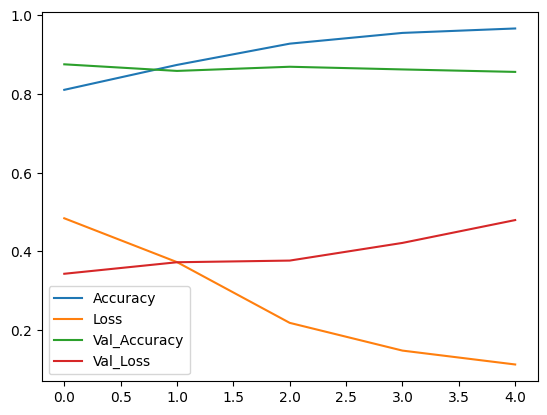

 
The Training Loss is 0.0794, And Training Accuracy is 0.9771
 
The Testing Loss is 0.4795, And Testing Accuracy is 0.8557


In [50]:
LSTM =lstm_(vocab_size= vocab_size + 1, embedding_dim= embedding_dim, max_length= max_length, dropout=0.5, units=64)
model_compile(model=LSTM)
history = model_fit(model=LSTM, X_train=encoded_X_train, y_train=y_train, epochs=5, X_test=encoded_X_test, y_test=y_test, batch_size=64, Callback=Callback, shuffle=True)
plot_accuracy_loss(histoty=history)
evaluate(model=LSTM, x=encoded_X_train, y=y_train, train_test='Training')
evaluate(model=LSTM, x=encoded_X_test,y= y_test, train_test='Testing')

**9-GRU**

Epoch 1/5
714/714 [==============================] - 127s 175ms/step - loss: 0.4682 - accuracy: 0.8127 - val_loss: 0.3468 - val_accuracy: 0.8751
Epoch 2/5
714/714 [==============================] - 125s 175ms/step - loss: 0.2400 - accuracy: 0.9168 - val_loss: 0.3590 - val_accuracy: 0.8682
Epoch 3/5
714/714 [==============================] - 112s 156ms/step - loss: 0.1539 - accuracy: 0.9512 - val_loss: 0.4139 - val_accuracy: 0.8630
Epoch 4/5
714/714 [==============================] - 108s 152ms/step - loss: 0.1097 - accuracy: 0.9644 - val_loss: 0.4738 - val_accuracy: 0.8604
Epoch 5/5
714/714 [==============================] - 109s 152ms/step - loss: 0.0876 - accuracy: 0.9710 - val_loss: 0.5106 - val_accuracy: 0.8433


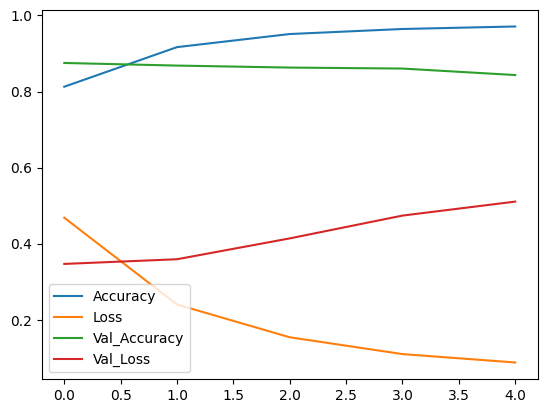

 
The Training Loss is 0.0642, And Training Accuracy is 0.9802
 
The Testing Loss is 0.5106, And Testing Accuracy is 0.8433


In [51]:
GRU_=gru_(vocab_size= vocab_size + 1, embedding_dim= embedding_dim, max_length= max_length, dropout=0.3, units=64)
model_compile(model=GRU_)
history = model_fit(model=GRU_, X_train=encoded_X_train, y_train=y_train, epochs=5, X_test=encoded_X_test, y_test=y_test, batch_size=64, Callback=Callback, shuffle=True)
plot_accuracy_loss(histoty=history)
evaluate(model=GRU_, x=encoded_X_train, y=y_train, train_test='Training')
evaluate(model=GRU_, x=encoded_X_test,y= y_test, train_test='Testing')

* In Future Work I Wiil Try To Decrease The Loss Values
* Using Transformer 